# Anomaly Detection

In [2]:
 # pip install pyod

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eif as iso

In [4]:
df = pd.read_csv('imbd_log.csv')

### HBOS

In [5]:
from pyod.models.hbos import HBOS

# Supponendo che 'df' sia il tuo dataframe
# Inizializza il modello HBOS
numeric_df = df.select_dtypes(include=['number'])

# Inizializza il modello HBOS
hbos = HBOS(contamination=0.01)

# Adatta il modello ai dati
hbos.fit(numeric_df)

# Ottieni i punteggi degli outlier
outlier_pt_hbos = hbos.decision_function(numeric_df)

# Ottieni le etichette degli outlier
outliers_hbos = hbos.labels_

# Aggiungi i punteggi e le etichette degli outlier al dataframe originale
df['outlier_pt_hbos'] = outlier_pt_hbos
df['outlier_hbos'] = outliers_hbos

print(df[['outlier_pt_hbos', 'outlier_hbos']])

        outlier_pt_hbos  outlier_hbos
0             20.542574             0
1             14.286763             0
2             12.334009             0
3             23.190280             0
4             24.300127             0
...                 ...           ...
149526         9.378729             0
149527        16.403796             0
149528        16.356439             0
149529         9.483305             0
149530        13.914544             0

[149531 rows x 2 columns]


In [6]:
# Calcola la percentuale di outlier
outlier_percentage = (df['outlier_hbos'].sum() / len(df)) * 100

print(f"La percentuale di outlier nel dataframe è: {outlier_percentage:.2f}%")

La percentuale di outlier nel dataframe è: 1.00%


### LOF

In [7]:
from pyod.models.lof import LOF

# Inizializza il modello LOF
lof = LOF(contamination=0.01)

# Adatta il modello ai dati
lof.fit(numeric_df)

# Ottieni i punteggi degli outlier
outlier_pt_lof = lof.decision_function(numeric_df)

# Ottieni le etichette degli outlier
outliers_lof = lof.labels_

# Aggiungi i punteggi e le etichette degli outlier al dataframe originale
df['outlier_pt_lof'] = outlier_pt_lof
df['outlier_lof'] = outliers_lof

# Calcola la percentuale di outlier
outlier_percentage = (df['outlier_lof'].sum() / len(df)) * 100

print(f"La percentuale di outlier nel dataframe è: {outlier_percentage:.2f}%")

La percentuale di outlier nel dataframe è: 1.00%


In [8]:
df[['outlier_pt_lof', 'outlier_lof']]

,outlier_pt_lof,outlier_lof
0,1.198228,0
1,2.735042,1
2,1.482108,0
3,1.233948,0
4,3.039155,1
...,...,...
149526,0.998449,0
149527,0.997697,0
149528,1.237468,0
149529,0.986319,0


### ABOD

In [9]:
from pyod.models.abod import ABOD

# Rimuovi le righe con valori NaN o infiniti
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna()

# Seleziona solo le variabili numeriche
numeric_df_clean = df_clean.select_dtypes(include=['number'])

# Inizializza il modello ABOD
abod = ABOD(contamination=0.01)

# Adatta il modello ai dati
abod.fit(numeric_df_clean)

# Ottieni i punteggi degli outlier
outlier_scores = abod.decision_function(numeric_df_clean)

# Ottieni le etichette degli outlier
outliers = abod.labels_

# Aggiungi i punteggi e le etichette degli outlier al dataframe originale
df['outlier_pt_abod'] = outlier_scores
df['outlier_abod'] = outliers

# Calcola la percentuale di outlier
outlier_percentage = (df['outlier_abod'].sum() / len(df)) * 100

print(f"La percentuale di outlier nel dataframe è: {outlier_percentage:.2f}%")

C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:219: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:4318: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, ou

La percentuale di outlier nel dataframe è: 0.00%


In [10]:
df[['outlier_pt_abod', 'outlier_abod']]

,outlier_pt_abod,outlier_abod
0,-1.716023e-03,0
1,-3.312965e-06,0
2,-3.492602e-04,0
3,-1.305653e-03,0
4,-1.557203e-07,0
...,...,...
149526,-1.763134e-03,0
149527,-3.686276e-04,0
149528,-4.823352e-04,0
149529,-1.485133e-02,0


In [15]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,writerCredits,directorsCredits,soundMixes,quotesTotal,outlier_pt_hbos,outlier_hbos,outlier_pt_lof,outlier_lof,outlier_pt_abod,outlier_abod
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,...,0.0,0.693147,['silent'],0.0,20.542574,0,1.198228,0,-1.716023e-03,0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,...,0.0,0.693147,['silent'],0.0,14.286763,0,2.735042,1,-3.312965e-06,0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,...,0.0,0.693147,['silent'],0.0,12.334009,0,1.482108,0,-3.492602e-04,0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,...,0.0,0.693147,['silent'],0.0,23.190280,0,1.233948,0,-1.305653e-03,0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1.0,0.000000,9.481588,2.564949,0.0,11,2.833213,...,0.0,1.098612,['silent'],0.0,24.300127,0,3.039155,1,-1.557203e-07,0


### Confronto

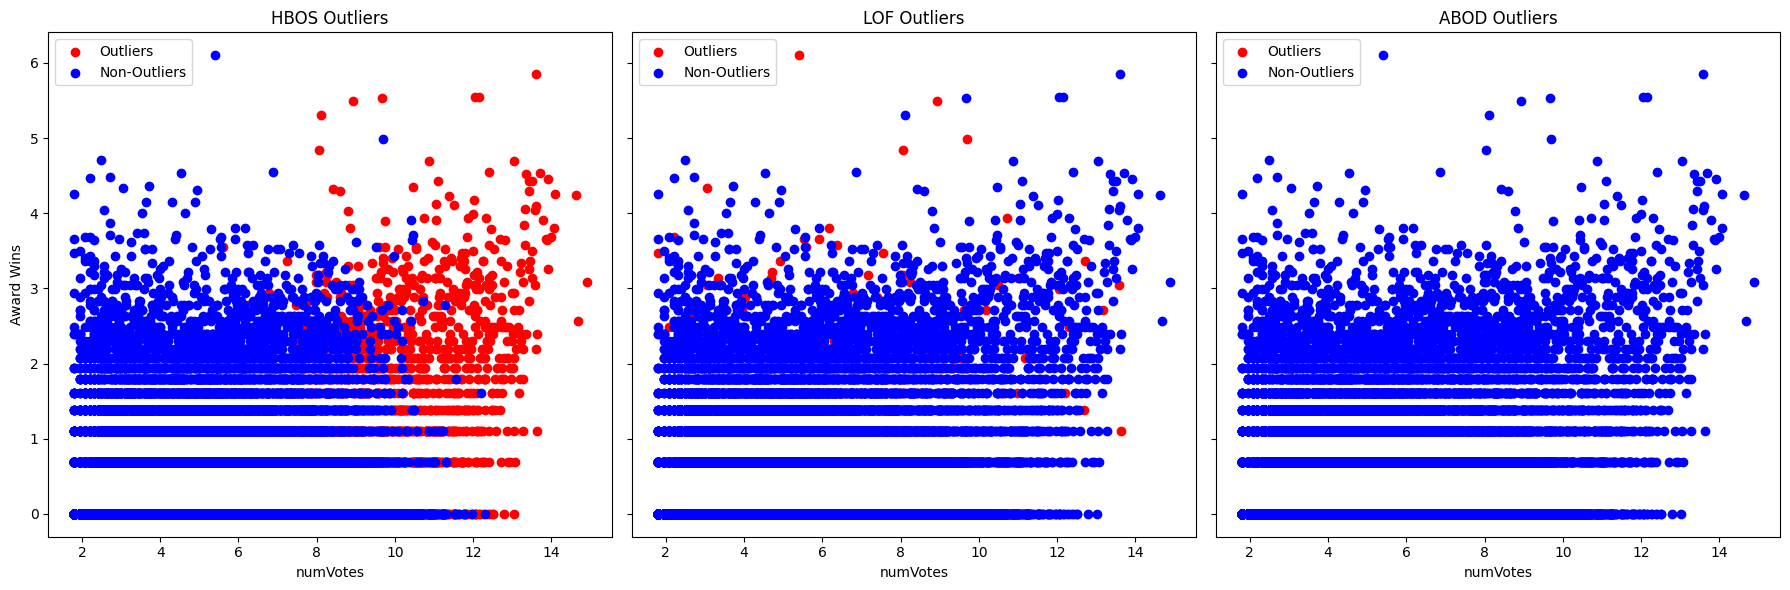

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Primo subplot (HBOS Outliers)
axes[0].scatter(df[df['outlier_hbos'] == 1]['numVotes'], df[df['outlier_hbos'] == 1]['awardWins'], color='red', label='Outliers')
axes[0].scatter(df[df['outlier_hbos'] == 0]['numVotes'], df[df['outlier_hbos'] == 0]['awardWins'], color='blue', label='Non-Outliers')
axes[0].set_xlabel('numVotes')
axes[0].set_ylabel('Award Wins')
axes[0].set_title('HBOS Outliers')
axes[0].legend()

# Secondo subplot (LOF Outliers)
axes[1].scatter(df[df['outlier_lof'] == 1]['numVotes'], df[df['outlier_lof'] == 1]['awardWins'], color='red', label='Outliers')
axes[1].scatter(df[df['outlier_lof'] == 0]['numVotes'], df[df['outlier_lof'] == 0]['awardWins'], color='blue', label='Non-Outliers')
axes[1].set_xlabel('numVotes')
axes[1].set_title('LOF Outliers')
axes[1].legend()

# Terzo subplot (ABOD Outliers)
axes[2].scatter(df[df['outlier_abod'] == 1]['numVotes'], df[df['outlier_abod'] == 1]['awardWins'], color='red', label='Outliers')
axes[2].scatter(df[df['outlier_abod'] == 0]['numVotes'], df[df['outlier_abod'] == 0]['awardWins'], color='blue', label='Non-Outliers')
axes[2].set_xlabel('numVotes')
axes[2].set_title('ABOD Outliers')
axes[2].legend()

plt.tight_layout()
plt.show()

In [59]:
# Confronta le colonne 'outlier_pt_hbos' e 'outlier_pt_lof'
corresponding_outliers = df[(df['outlier_hbos'] == 1) & (df['outlier_lof'] == 1)]

# Calcola il numero di outlier corrispondenti
num_corresponding_outliers = len(corresponding_outliers)

print(f"Il numero di outlier corrispondenti tra i due metodi è: {num_corresponding_outliers}")

#tra hbos e lof sono 3000 gli outlier corrispondenti



Il numero di outlier corrispondenti tra i due metodi è: 54


### Isolation Forest

In [13]:
from pyod.models.iforest import IsolationForest

In [20]:
clf = IsolationForest()
clf.fit(numeric_df)                  # è stato usato lo stesso numeric_df visto in HBOS, LOF e ABOD

IsolationForest()

In [21]:
outliers = clf.predict(numeric_df)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 12627, 136904]))

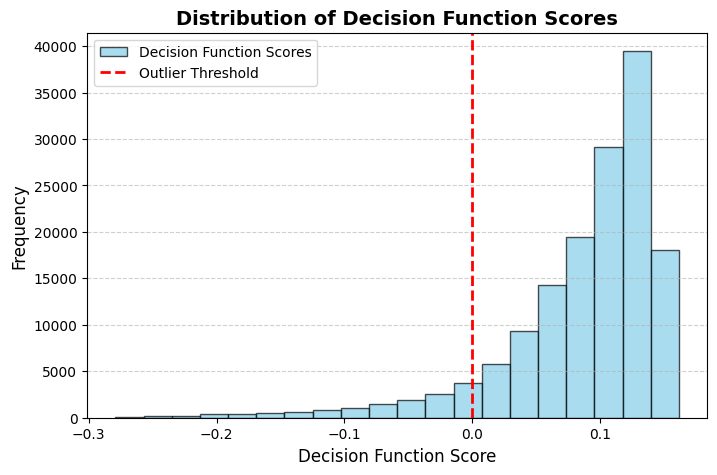

In [ ]:
# Calcola la decision function
scores = clf.decision_function(numeric_df)

# Crea l'istogramma con un colore più chiaro
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label="Decision Function Scores")

# Aggiunge una linea verticale per evidenziare il threshold degli outlier
threshold = np.min(scores[np.where(outliers == 1)])
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="Outlier Threshold")

# Miglioramenti estetici
plt.xlabel("Decision Function Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Decision Function Scores", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Aggiunge una griglia leggera

# Mostra il grafico
plt.show()

### Extended Forest

In [33]:
from eif import iForest

In [34]:
# Crea l'Extended Isolation Forest
forest = iForest(numeric_df.values, ntrees=100, sample_size=100, ExtensionLevel=1) # se hai un dataframe lo devi convertire in array con .values

# Calcola i punteggi di anomalia
scores = forest.compute_paths(numeric_df.values)

scores

array([0.54677267, 0.50779099, 0.50161182, ..., 0.4260082 , 0.36120479,
       0.38929666])

In [66]:
ss1=np.argsort(scores)

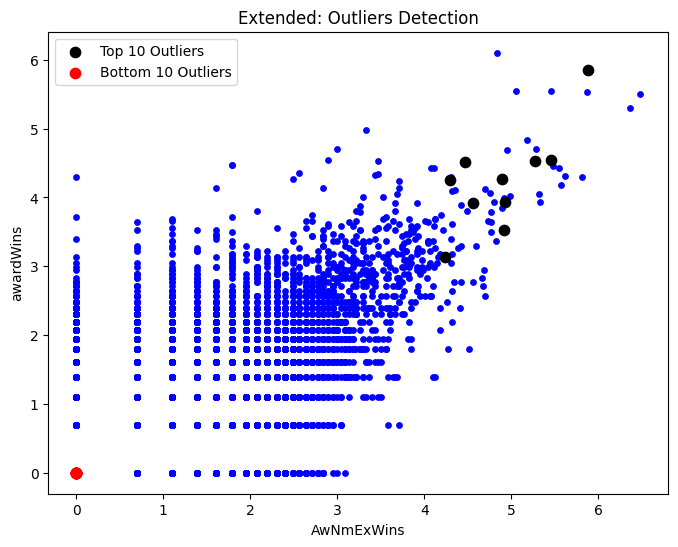

In [67]:
x = df["AwNmExWins"].values
y = df["awardWins"].values

f = plt.figure(figsize=(8,6))  # Riduciamo la dimensione perché c'è solo un grafico
plt.scatter(x, y, s=15, c='b', edgecolor='b')
plt.scatter(x[ss1[-10:]], y[ss1[-10:]], s=55, c='k', label="Top 10 Outliers")  # Outlier più anomali in nero
plt.scatter(x[ss1[:10]], y[ss1[:10]], s=55, c='r', label="Bottom 10 Outliers")  # Outlier meno anomali in rosso
plt.xlabel("AwNmExWins")  # Etichetta asse X
plt.ylabel("awardWins")  # Etichetta asse Y
plt.title("Extended: Outliers Detection")  # Titolo aggiornato
plt.legend()
plt.show()

In [68]:
X_2D = numeric_df[['AwNmExWins', 'awardWins']].values                  # Usa solo due colonne per la griglia 2D

# 3️⃣ Crea la griglia per la visualizzazione
xx, yy = np.meshgrid(
    np.linspace(X_2D[:, 0].min() - 1, X_2D[:, 0].max() + 1, 100),
    np.linspace(X_2D[:, 1].min() - 1, X_2D[:, 1].max() + 1, 100)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]  # Unisce le due coordinate in un array 2D (10000, 2)

# 4️⃣ Stima i punteggi EIF sulla griglia USANDO IL MODELLO ALLENATO SU TUTTE LE FEATURE
# Per predire i punteggi su 2 feature, creiamo array con tutte le colonne di X_all e riempiamo le altre con la media
grid_all = np.tile(numeric_df.mean().values, (grid_points.shape[0], 1))  # Array (10000, 20) con medie
grid_all[:, numeric_df.columns.get_loc('AwNmExWins')] = grid_points[:, 0]  # Sostituiamo feature1
grid_all[:, numeric_df.columns.get_loc('awardWins')] = grid_points[:, 1]  # Sostituiamo feature2

S1 = clf.decision_function(grid_all)  # Calcola i punteggi su tutta la griglia
S1 = S1.reshape(xx.shape)  # Ricostruisce la forma della griglia

C:\Users\alban\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


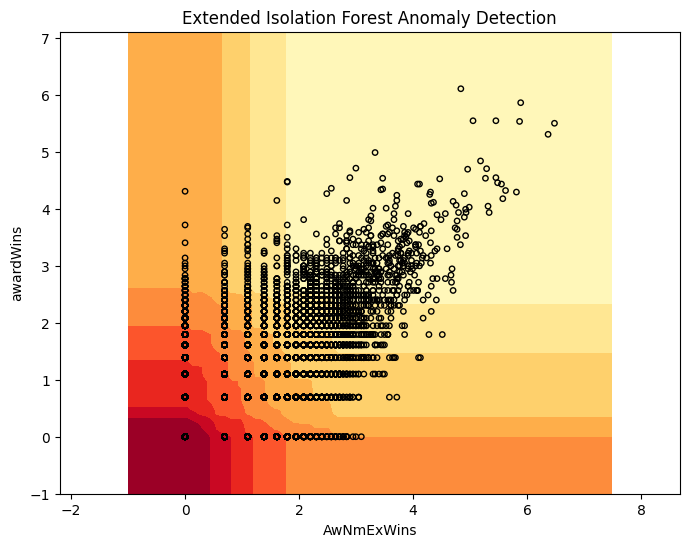

In [69]:
x = df["AwNmExWins"].values
y = df["awardWins"].values
plt.figure(figsize=(8,6))  # Ridimensioniamo la figura

# Creiamo il grafico del secondo subplot
levels = np.linspace(np.min(S1), np.max(S1), 10)  # Assicuriamoci che i livelli siano corretti
plt.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)  # Heatmap delle anomalie
plt.scatter(x, y, s=15, c='None', edgecolor='k')  # Dati originali
plt.axis("equal")  # Manteniamo le proporzioni

# Titoli e label
plt.xlabel("AwNmExWins")  # Sostituisci con il nome corretto della feature su x
plt.ylabel("awardWins")  # Sostituisci con il nome corretto della feature su y
plt.title("Extended Isolation Forest Anomaly Detection")  

plt.show()

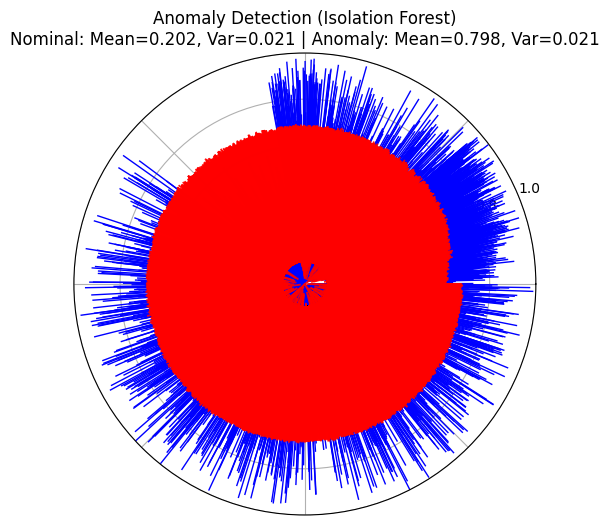

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Normalizziamo i punteggi tra 0 e 1 per evitare sbilanciamenti
scores_norm = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))

# Calcoliamo gli angoli per il grafico polare
angles = np.linspace(0, 2 * np.pi, len(scores_norm))

def get_anomaly_vals(scores, reference_index, sorted=True):
    """Restituisce i valori di anomalia rispetto a un punto di riferimento"""
    diffs = np.abs(scores - scores[reference_index])  
    if sorted:
        sorted_indices = np.argsort(diffs)  
        diffs = diffs[sorted_indices]
        angles_sorted = angles[sorted_indices]
        return diffs, angles_sorted
    return diffs, angles

# Selezioniamo un valore normale e uno anomalo
normal_index = np.argmin(scores_norm)  
anomaly_index = np.argmax(scores_norm)  

# Creiamo il grafico polare
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='polar')

# 🔵 Valori normali in blu
rn, thetan = get_anomaly_vals(scores_norm, normal_index, sorted=True)
for j in range(len(rn)):
    ax.plot([thetan[j], thetan[j]], [0.1, rn[j]], color='b', alpha=1, lw=1)

# 🔴 Anomalie in rosso (ridimensionate con scala log)
ra, thetaa = get_anomaly_vals(scores_norm, anomaly_index, sorted=True)
for j in range(len(ra)):
    ax.plot([thetaa[j], thetaa[j]], [0.1, np.log1p(ra[j])], color='r', alpha=0.9, lw=1.3)

# Titolo migliorato
ax.set_title("Anomaly Detection (Isolation Forest)\nNominal: Mean={:.3f}, Var={:.3f} | Anomaly: Mean={:.3f}, Var={:.3f}".format(
    np.mean(rn), np.var(rn), np.mean(ra), np.var(ra)
))

ax.set_xticklabels([])
ax.set_ylim(0, 1)  # Normalizzato tra 0 e 1

plt.show()


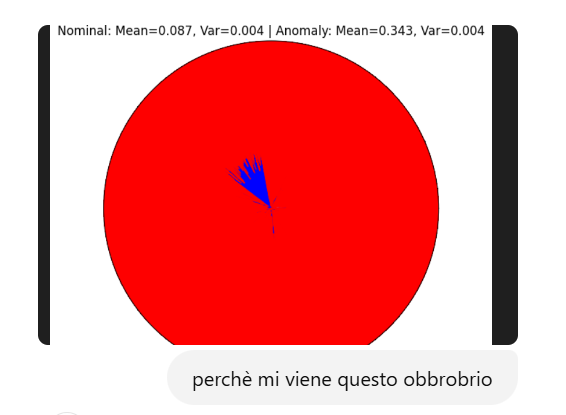

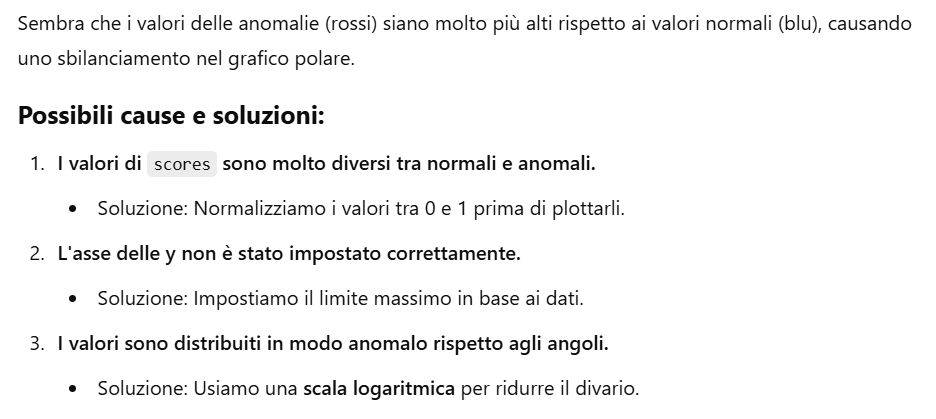

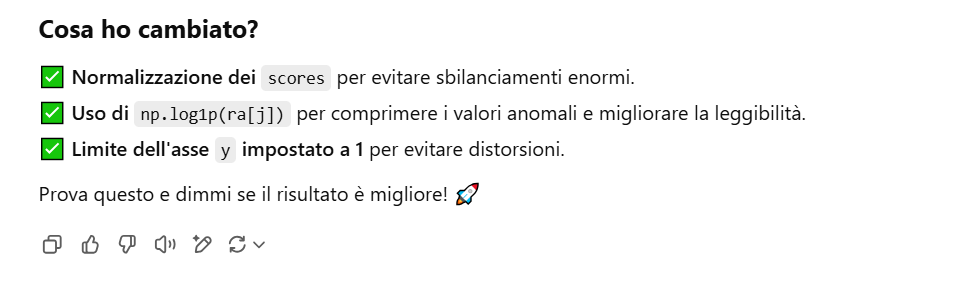

Non mi sono visto bene il codice dell'ultimo grafico, ma quello che avevo scritto io veniva una merda quindi l ho fatto rifare a chat, domani vedo bene cosa mi ha combinato, intanto vi lascio i messaggi che mi ha dato come output